<a href="https://colab.research.google.com/github/GuptaRitik/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -Ritik Gupta**
##### **Team Member 2 - NA**
##### **Team Member 3 - NA**
##### **Team Member 4 - NA**

# **Project Summary -**

# **GitHub Link -**

***Repository Link***:- https://github.com/GuptaRitik/Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


**In today's competitive restaurant industry, it is crucial for companies to understand the market and target the right audience in order to drive growth and success. This project aims to provide a comprehensive solution to this problem by utilizing advanced data analytics and machine learning techniques to cluster Zomato restaurants into segments based on various factors such as cuisine and cost. By understanding the market segments, the company will be able to target the right audience and make data-driven decisions. Additionally, the project will also analyze customer sentiment and reviews, which will account for 40% of the project, to extract valuable insights and identify areas for improvement that can increase customer satisfaction. Overall, this project aims to empower the restaurant industry with a thorough understanding of the market and actionable recommendations for driving business growth.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [1]:
# mounting drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
from wordcloud import WordCloud

import nltk
!pip install contractions
nltk.download('punkt')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install -U yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 18.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML- Clustering/Zomato Restaurant names and Metadata.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML- Clustering/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look (Restaurent data)
df.head(6)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."


In [5]:
# Dataset First Look (Reviews data)
df_reviews.head(6)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f' Restaurents data has {df.shape[0]} Rows and {df.shape[1]} features')
print(f' Reviews data has {df_reviews.shape[0]} Rows and {df_reviews.shape[1]} features')

 Restaurents data has 105 Rows and 6 features
 Reviews data has 10000 Rows and 7 features


### Dataset Information

In [7]:
# Dataset Info
print('Restaurant Data info:-\n')
print(df.info())
print('--'*40,'\n')

print('Reviews Data info:-\n')
print(df_reviews.info())

Restaurant Data info:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
None
-------------------------------------------------------------------------------- 

Reviews Data info:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Tim

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'No. of duplicates in Restaurants data:-  {df.duplicated().sum()}')
print(f'No. of duplicates in Reviews data:-      {df_reviews.duplicated().sum()}') 

No. of duplicates in Restaurants data:-  0
No. of duplicates in Reviews data:-      36


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print('Missing Values in Restaurants Data:-')
print(df.isnull().sum(),'\n')

print('Missing Values in Reviews Data:-')
print(df_reviews.isnull().sum())

Missing Values in Restaurants Data:-
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Data:-
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'Missing/Nulls of Reviews Data')

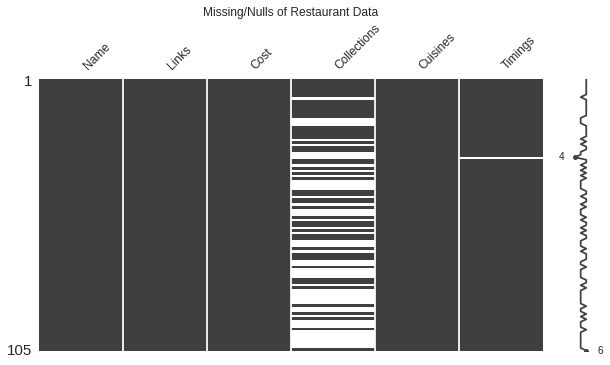

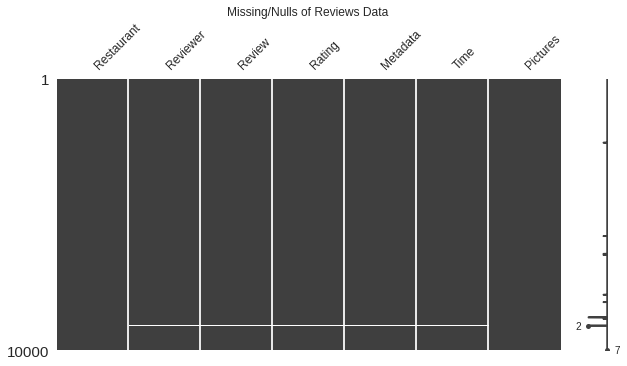

In [10]:
# Visualize Null/Missing values

import missingno # library to visualize nulls

missingno.matrix(df,figsize=(10,5), fontsize=12);
plt.title('Missing/Nulls of Restaurant Data')

print('\n')

missingno.matrix(df_reviews,figsize=(10,5), fontsize=12);
plt.title('Missing/Nulls of Reviews Data')
 

### What did you know about your dataset?

**Restaurent Data**
* We have limited number of rows and features in this dataset.
* dtype of 'Cost' should be integer, but its showing object, needs some treatment.
* 'Timing' feature has to be specific working hours of restaurant but here its unstructured.
* It has no duplicate values
* 'Timing' column has a null and 'Collection' feature has 51% of Null values.

**Reviews Data**
* 1000 rows and 7 features presented in this data.
* except 'Restaurent' and 'Pictures', every feature has some nulls.
* 'Rating' dtype has to be int, but its showing object.
* 36 values are duplicated in this data, and mostly duplicates have null values
* 'Timing' feature should be datetime but its showing object.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f'Restaurant data columns:- {list(df.columns)}\n')
print(f'Review data columns:- {list(df_reviews.columns)}')

Restaurant data columns:- ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Review data columns:- ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [12]:
# Dataset Describe for Restaurant data
df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [13]:
# Dataset Describe for Reviews data
df_reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

**Restaurant Data**

* Name : Name of Restaurants

* Links : Web Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Reviews Data**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print('No. of Unique values in Restaurant Data')
print(df.nunique(), '\n')

print('No. of Unique values in Reviews Data')
print(df_reviews.nunique())

No. of Unique values in Restaurant Data
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

No. of Unique values in Reviews Data
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

####  --- For Restaurant Data -

In [15]:
# Write your code to make your dataset analysis ready.

# converting "Cost" dtype from object to integert by removing 'comma'
df.loc[:,'Cost'] = pd.to_numeric(df.loc[:,'Cost'].str.replace(',',''))


#1 Getting location of restaurant
df['Location'] = df['Links'].apply(lambda x: x.split('/')[3])  #getting location from web link presented in third position of index after split

In [16]:
df['Location'].value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [17]:
# extracting unique cuisines and its occurances in dictionary 

cuisine_list=df.Cuisines.str.split(', ') # seperating cuisines for each restaurants
cuis={}
for i in cuisine_list:                  # Iterating thorugh each row 
    for j in i:                         # Iterating through each cuising in the row     
        if (j in cuis):                 # adding occurances
            cuis[j]+=1
        else:
            cuis[j]=1

# converting the occurance dictionary into dataframe
cuis_df=pd.DataFrame(cuis.values(), index=cuis.keys(),
                     columns={'Counts of Restaurants'})

# sorting values by occurances 
cuis_df.sort_values(by='Counts of Restaurants',ascending=False, inplace=True)

#### --- For Reviews Data

In [18]:
# Review has a string value, lets check it if we can find any meaning from this.
df_reviews.loc[df_reviews['Rating'] == 'Like']['Review'][7601]

'One of the best pizzas to try. It served with the fresh crust and the topping of veggies are fresh and the taste of the ingredients was awesome and it is fully overloaded with Cheese. I would like to recommend to try every Time I wager for pizza'

With help of common sense, we able to figure out that the highest probability rating shoud be between 4 or 5, so we can take average value as 4.5

In [19]:
# --Preparation for EDA (Reviews Data)--

# storing default mode of warnings
# chained_assignment = pd.options.mode.chained_assignment
# Set the chained assignment setting to None to suppress the warning
pd.options.mode.chained_assignment = None


# as per null value visualization and counts, some values are totally null in all features and have no information that affect analysis so we drop it
df_reviews = df_reviews.dropna(subset=['Time'], how='all')

# invalid entry of 'like' in reviews convert to number
df_reviews.loc[df_reviews['Rating'] == 'Like', 'Rating'] = 4.5

# converting datatype from 'object' to 'numeric' 
df_reviews['Rating'] = pd.to_numeric(df_reviews['Rating'])

# seperating reviews and folowers from metadata
df_reviews[['Reviews_given', 'Followers']] = df_reviews['Metadata'].str.split(',', expand=True)
df_reviews['Reviews_given'] = pd.to_numeric(df_reviews['Reviews_given'].str.split(' ').str[0])
df_reviews['Followers'] = pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])

# Some of reviewers has 0 followers but its showing as Nulls, we can fill them with 0
df_reviews['Followers'].fillna(0, inplace=True)

# converting time from object to datetime 
df_reviews['Time'] = pd.to_datetime(df_reviews['Time'])

# convert time of day into categories like noon evening morning etc.
boundaries=[0,4,8,12,16,20,24]
labels=['early_morning','morning','post_morning','noon','evening','night']
df_reviews['Time_of_day']=pd.cut(df_reviews['Time'].dt.hour,
                              bins=boundaries,
                              labels=labels,
                              include_lowest=True)


#create a new column to store week of month
df_reviews['Week_of_month'] = (df_reviews.Time.dt.day/7
                               ).apply(lambda x: math.ceil(x))

# we have extracted value from "Metadata", we can drop it. 
df_reviews = df_reviews.drop(columns='Metadata')


# Set the chained assignment setting back to its original value
# pd.options.mode.chained_assignment = chained_assignment

Merging both Dataframes

In [20]:
# making similar names of both data to merge on
df_reviews1 = df_reviews.rename(columns={'Restaurant':'Name'})

merge_df = pd.merge(df, df_reviews1, on='Name', how='right') # merging both df on restaurant name column

merge_df.dropna(axis=0, subset=['Review'], inplace= True)  #dropping Nulls of Review column

# adding number of cuisines
merge_df['no_of_cuisines'] = merge_df['Cuisines'].apply(
                                      lambda x: len(x.split(', '))
                                      )
# adding number of words in review provided by critic
merge_df['len_of_review'] = merge_df.Review.apply(lambda x: len(x.split()))

Preparation for total reviews, followers, pictures based on year

In [21]:
# calculating year wise total reviews given
review_follow_1=df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                                   ).apply(lambda x:np.sum(x['Reviews_given'])
                                   ).reset_index(name='Total Reviews')

# year wise total followers
review_follow_2 = df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                                     ).apply(lambda x:np.max(x['Followers'])
                                     ).reset_index(name='Total Followers')

# year wise total pictures uploaded
pictures =df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                             ).apply(lambda x:np.sum(x['Pictures'])
                             ).reset_index(name='Total Pictures')

# merging all above data
review_follow=pd.merge(review_follow_1,review_follow_2, 
                       how='inner',left_on='Time',right_on='Time')

review_follow=pd.merge(review_follow, pictures, how='inner',
                       left_on='Time',right_on='Time').rename(columns={'Time':'Year'}) # finally merged all 3 data into one

In [22]:
df.head(4)

,Name,Links,Cost,Collections,Cuisines,Timings,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,hyderabad


In [23]:
df_reviews.head(4)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews_given,Followers,Time_of_day,Week_of_month
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,noon,4
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,noon,4
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,night,4
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,night,4


### What all manipulations have you done and insights you found?

I have to change data types of columns to their respective adantage, so that it will add value in our analysis, some value in feature are different from others so replace that with basic logic and extracted relevant information from 'Metadata' also extracted the city of restaurents from URL's provided, Added some columns like "length of reviews" and "number of cuisines".

**Insights:-**
* Almost every city is hydrabad, so its a specific dataset of hydrabad restaurants
* Duplicates in reviews data are just Null values, hence removing nulls also remove duplicates
* There is a variation in reviews length, as some has more words and some has less, will see how it impacts ratings ,
* Maximun 6 cuisines presented in a restaurant.
* Extracted the numbers of followers and Review given.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***